In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()



,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


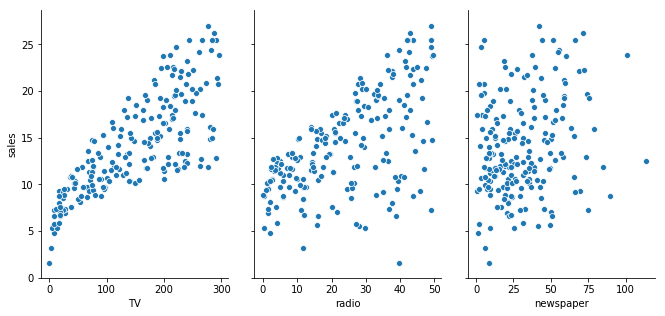

In [3]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=4.5, aspect=0.7)

In [ ]:
tweets = pd.read_csv('so_many_tweets.csv')


In [ ]:
first_tweet = tweets['Text'][0]         # first tweet in the dataset
words_in_tweet = first_tweet.split(' ') # a list of words in the 
for word in words_in_tweet:             # for each word in the list
    if "$" in word:
        print "THIS TWEET IS ABOUT", word



In [ ]:
words_in_tweet


In [5]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


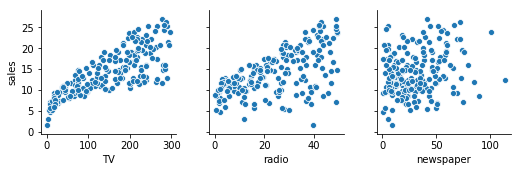

In [6]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales')


In [7]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer

# grab postings from the web
texts = []
for i in range(0,1000,10): # cycle through 100 pages of indeed job resources
    soup = BeautifulSoup(requests.get('http://www.indeed.com/jobs?q=data+scientist&start='+str(i)).text)
    texts += [a.text for a in soup.findAll('span', {'class':'summary'})]


print(type(texts))

print(texts[0])   # first job description


<class 'list'>

            As an intern you will work side-by-side with our data scientists with responsibilities including:. Use data visualization, statistical analysis, pattern...


In [8]:
vect = CountVectorizer(ngram_range=(1,2), stop_words='english')
# make a count vectorizer to get basic counts

matrix = vect.fit_transform(texts)
# fit and learn to the vocabulary in the corpus

print(len(vect.get_feature_names()))  # how many features are there

freqs = [(word, matrix.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
#sort from largest to smallest
for phrase, times in sorted (freqs, key = lambda x: -x[1])[:25]:
    print(phrase, times)
    
    
    

10782
data 1361
learning 361
machine 339
machine learning 316
analytics 250
scientist 249
data scientist 236
experience 186
scientists 181
data scientists 150
science 149
statistical 137
team 136
business 133
mining 133
analysis 131
data mining 117
work 113
data science 110
techniques 100
insights 93
models 92
deep 77
modeling 75
statistics 73


In [9]:
print(len(texts))


1000
